# Identificación de Género mediante Variables Antropométricas y Conductuales

## 1. Acerca del conjunto de Datos:

El National Health and Nutrition Examination Survey (NHANES) es un programa de estudios diseñado para evaluar el estado de salud y nutrición de adultos y niños en los Estados Unidos. Este estudio es único porque combina entrevistas y exámenes físicos. NHANES es un importante programa del National Center for Health Statistics (NCHS), que forma parte de los Centers for Disease Control and Prevention (CDC) y es responsable de producir estadísticas vitales y de salud para la nación.

El programa NHANES inició en la década de 1960 y se ha llevado a cabo como una serie de encuestas centradas en diferentes grupos de población o temas de salud. A partir de 1999, se convirtió en un programa continuo con un enfoque cambiante en diversas mediciones de salud y nutrición para satisfacer las necesidades emergentes. La encuesta examina una muestra representativa a nivel nacional de alrededor de 5,000 personas cada año, distribuidas en condados de todo el país, 15 de los cuales son visitados cada año.

Las entrevistas de NHANES incluyen preguntas demográficas, socioeconómicas, dietéticas y relacionadas con la salud. El componente de examen consiste en mediciones médicas, dentales y fisiológicas, así como pruebas de laboratorio administradas por personal médico altamente capacitado.

Los hallazgos de esta encuesta se utilizan para determinar la prevalencia de enfermedades principales y factores de riesgo para enfermedades. La información se utiliza para evaluar el estado nutricional y su asociación con la promoción de la salud y la prevención de enfermedades. Los resultados de NHANES también son la base para estándares nacionales en mediciones como altura, peso y presión arterial, y los datos se utilizan en estudios epidemiológicos y de investigación en ciencias de la salud.

En cuanto al contenido de la encuesta, se recopilan datos sobre la prevalencia de condiciones crónicas en la población, así como factores de riesgo que pueden aumentar las posibilidades de desarrollar ciertas enfermedades o afecciones. Se estudian aspectos como tabaquismo, consumo de alcohol, prácticas sexuales, uso de drogas, condición física y actividad, peso e ingesta dietética. También se recopila información sobre aspectos de la salud reproductiva, como el uso de anticonceptivos orales y prácticas de lactancia.

La muestra para la encuesta se selecciona para representar a la población de los Estados Unidos de todas las edades. Para producir estadísticas confiables, NHANES sobremuestra a personas de 60 años o más, afroamericanos e hispanos.

En este caso en particular se usaran los datos del NHANES recopilados entre 2015-2016.

## 2. Análisis exploratorio de datos:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Especifica el nombre del archivo (o su ruta completa)
archivo = "nhanes_2015_2016.csv"

# Obtén la ruta absoluta del archivo
path = os.path.abspath(archivo)

print(path)

/Users/robertogda/nhanes_2015_2016.csv


In [3]:
# Leer el archivo
df = pd.read_csv('~/Documents/Ciencia Datos/Datasets/nhanes_2015_2016.csv')

#Visualizar las primeras líneas del codigo: 

df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.shape

(5735, 28)

In [5]:
df.dtypes

SEQN          int64
ALQ101      float64
ALQ110      float64
ALQ130      float64
SMQ020        int64
RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDCITZN    float64
DMDEDUC2    float64
DMDMARTL    float64
DMDHHSIZ      int64
WTINT2YR    float64
SDMVPSU       int64
SDMVSTRA      int64
INDFMPIR    float64
BPXSY1      float64
BPXDI1      float64
BPXSY2      float64
BPXDI2      float64
BMXWT       float64
BMXHT       float64
BMXBMI      float64
BMXLEG      float64
BMXARML     float64
BMXARMC     float64
BMXWAIST    float64
HIQ210      float64
dtype: object

In [6]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

Las columnas proporcionadas representan variables de distintas variables étnicas, antropométricas, conductuales, etc. se analizará a que corresponde cada una de las columnas para hacer un análisis de los datos.

1. `SEQN`: Número de secuencia único asignado a cada individuo en el conjunto de datos.

2. `ALQ101`: Indica si la persona ha consumido más de 12 bebidas alcohólicas en los últimos 12 meses.

3. `ALQ110`: Indica si la persona ha consumido 12 bebidas alcohólicas a lo largo de su vida.

4. `ALQ130`: Indica la cantidad promedio de bebidas alcohólicas consumidas durante los últimos 12 meses.

5. `SMQ020`: Indica si el sujeto ha fumado al menos 100 cigarrillos a lo largo de su vida.

6. `RIAGENDR`: Género del individuo.

7. `RIDAGEYR`: Edad del individuo en años.

8. `RIDRETH1`: Categoría de origen étnico.

9. `DMDCITZN`: Ciudadanía del individuo.

10. `DMDEDUC2`: Nivel educativo del individuo (Adulto).

11. `DMDMARTL`: Estado civil del individuo.

12. `DMDHHSIZ`: Número de personas en el hogar del individuo.

13. `WTINT2YR`: Peso del individuo ajustado para tener en cuenta el diseño de muestreo complejo.

14. `SDMVPSU`: Unidad primaria de muestreo (PSU).

15. `SDMVSTRA`: Área de estratificación (Pseudo-estratificada).

16. `INDFMPIR`: Índice de pobreza para la familia.

17. `BPXSY1`: Presión arterial sistólica en la primera medición.

18. `BPXDI1`: Presión arterial diastólica en la primera medición.

19. `BPXSY2`: Presión arterial sistólica en la segunda medición.

20. `BPXDI2`: Presión arterial diastólica en la segunda medición.

21. `BMXWT`: Peso del individuo en kilogramos.

22. `BMXHT`: Altura del individuo en centímetros.

23. `BMXBMI`: Índice de masa corporal (IMC) del individuo.

24. `BMXLEG`: Longitud de la pierna.

25. `BMXARML`: Longitud del brazo izquierdo.

26. `BMXARMC`: Circunferencia del brazo.

27. `BMXWAIST`: Circunferencia de la cintura.

28. `HIQ210`: Indica si el entrevistado tuvo cobertura de algún seguro de salud durante los últimos 12 meses.

Estos nombres son genéricos y pueden variar según la fuente del conjunto de datos específico. Para obtener información precisa sobre el significado exacto de cada columna, es recomendable consultar la documentación del conjunto de datos o la fuente original.

Con base en estas variables, se pueden seleccionar algunas de ellas para determinar si son aptas para predecir el género del sujeto, ya sea hombre o mujer. En este caso particular, se piensa que las variables que podrían tener relevancia son:

ALQ101, ALQ110, ALQ130, SMQ020, DMDEDUC2, DMDMARTL, BPXSY2, BPXDI2, BMXWT, BMXHT, BMXBMI, BMXLEG, BMXARML, BMXARMC y BMXWAIST y HIQ210.

Estas serán consideradas las variables dependientes o de respuesta.

Mientras que la variable de género se considerará como la variable independiente.

A continuación se analizará como está especificada la variable de generó en nuestro codigo: 

In [7]:
df['RIAGENDR'].value_counts()

RIAGENDR
2    2976
1    2759
Name: count, dtype: int64

Nuestro array parece contener exclusivamente valores de 1 y 2. Según la documentación del NHANES, estos valores corresponden a 1 cuando se refiere a un hombre y a 2 cuando se refiere a una mujer.

Aunque estas variables son convenientes y podrían utilizarse directamente como variables dummy, hemos decidido cambiarlas a 0 y 1. Esta elección se fundamenta en que es más común y convencional emplear estos valores como variables dummy al realizar una regresión logística. Este ajuste facilitará la interpretación de los resultados y asegurará una mayor consistencia con las prácticas estándar en el análisis estadístico.

En este caso se asignara: 0 a hombre, y 1 a mujer. 

In [8]:
df['RIAGENDR'] = df['RIAGENDR'].replace({1: 0, 2: 1})

df['RIAGENDR'].head()

0    0
1    0
2    0
3    1
4    1
Name: RIAGENDR, dtype: int64

Ahora se hará un análisis exploratorio de cada una de las columnas seleccionadas:

In [9]:
# Lista de columnas a seleccionar
columnas= ['RIAGENDR','ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'DMDEDUC2', 'DMDMARTL', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST','HIQ210']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_datos = df[columnas]

df_datos.head()



,RIAGENDR,ALQ101,ALQ110,ALQ130,SMQ020,DMDEDUC2,DMDMARTL,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,0,1.0,NaN,1.0,1,5.0,1.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,0,1.0,NaN,6.0,1,3.0,3.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,0,1.0,NaN,NaN,1,3.0,1.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,1,2.0,1.0,1.0,2,5.0,6.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,1,2.0,1.0,1.0,2,4.0,3.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


Ahora se requiere saber si hay algunas columnas con demasiados valores faltantes, ya que en caso de haberlos esa variable podría no ser de tanto interés: 


In [10]:
# Contar la cantidad de NaN por columna
nan_por_columna = df_datos.isna().sum()

# Imprimir la cantidad de NaN por columna
print(nan_por_columna)


RIAGENDR       0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
DMDEDUC2     261
DMDMARTL     261
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64


Se observa que las columnas de ALQ110 y ALQ130 tienen muchos valores faltantes, por lo que se eliminarán de nuestro análisis, de igual manera al revisar la [documentación](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm), estás son variables categóricas, y al menos ALQ130 proporcióna muy poca información. En caso de ser necesario se revisará de nuevo el modelo tomando en cuenta ALQ110 aunque la cantidad de sujetos sea menor. 


In [11]:
# Eliminar las columnas 'ALQ110' y 'ALQ130' 
df_datos2 = df_datos.drop(['ALQ110', 'ALQ130'], axis=1)

df_datos2.head()

,RIAGENDR,ALQ101,SMQ020,DMDEDUC2,DMDMARTL,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,0,1.0,1,5.0,1.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,0,1.0,1,3.0,3.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,0,1.0,1,3.0,1.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,1,2.0,2,5.0,6.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,1,2.0,2,4.0,3.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


Ahora se hará un análisis para saber con que tipo de datos se cuenta:

In [12]:
# Iterar a través de cada columna y mostrar los diferentes valores y sus recuentos
for columna in df_datos2.columns:
    valores_y_recuentos = df_datos2[columna].value_counts()
    print(f"\nColumna: {columna}\n{valores_y_recuentos}")



Columna: RIAGENDR
RIAGENDR
1    2976
0    2759
Name: count, dtype: int64

Columna: ALQ101
ALQ101
1.0    3477
2.0    1728
9.0       3
Name: count, dtype: int64

Columna: SMQ020
SMQ020
2    3406
1    2319
9       8
7       2
Name: count, dtype: int64

Columna: DMDEDUC2
DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64

Columna: DMDMARTL
DMDMARTL
1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: count, dtype: int64

Columna: BPXSY2
BPXSY2
114.0    315
116.0    312
124.0    306
126.0    275
118.0    264
        ... 
238.0      1
226.0      1
210.0      1
200.0      1
196.0      1
Name: count, Length: 67, dtype: int64

Columna: BPXDI2
BPXDI2
68.0     402
66.0     398
74.0     381
72.0     368
76.0     360
64.0     356
78.0     337
70.0     312
62.0     272
60.0     252
58.0     217
80.0     202
56.0     197
84.0     191
82.0     182
54.0     166
52.0     128
86.0     108
88.0     101
50.

Como se observá en la documentación, se cuenta con variables categóricas, y generalmente el 7 o el 9, el 77 o el 99 se usan cuando el sujeto "no sabe" la respuesta, o se rehúso a contestar. Entonces se eliminaran estos datos así como los valores faltantes de las columnas:


In [13]:
# Lista de columnas a limpiar
columnas_limpiar = ['HIQ210', 'DMDMARTL', 'DMDEDUC2', 'SMQ020', 'ALQ101']

# Reemplazar valores no deseados por NaN en columnas seleccionadas
df_datos2[columnas_limpiar] = df_datos2[columnas_limpiar].replace({7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan})

# Aplicar dropna a todo el DataFrame
df_datos3 = df_datos2.dropna()

# Iterar a través de cada columna y mostrar los diferentes valores y sus recuentos
for columna in df_datos3[columnas_limpiar].columns:
    valores_y_recuentos = df_datos2[columna].value_counts()
    print(f"\nColumna: {columna}\n{valores_y_recuentos}")



Columna: HIQ210
HIQ210
2.0    4268
1.0     456
Name: count, dtype: int64

Columna: DMDMARTL
DMDMARTL
1.0    2780
5.0    1004
3.0     579
6.0     527
2.0     396
4.0     186
Name: count, dtype: int64

Columna: DMDEDUC2
DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
Name: count, dtype: int64

Columna: SMQ020
SMQ020
2.0    3406
1.0    2319
Name: count, dtype: int64

Columna: ALQ101
ALQ101
1.0    3477
2.0    1728
Name: count, dtype: int64


La limpieza de los datos se llevó a cabo de manera efectiva. Para comprender el significado de cada variable, se puede consultar la documentación. La información sobre DMDMARTL y DMDEDUC2 está disponible [aquí](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL).

Para [SMQ020](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020), [HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210), y [ALQ101](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm), se puede encontrar información adicional en los enlaces proporcionados. 

A continuación, analizaremos si existe alguna correlación significativa con el género en nuestros datos para identificar las variables más relevantes.

In [14]:
correlaciones_genero = df_datos3.corr()['RIAGENDR']

# Filtrar solo aquellas correlaciones mayores a 0.1 en valor absoluto
correlaciones_significativas = correlaciones_genero[abs(correlaciones_genero) > 0.1].sort_values(ascending=True)

# Imprimir las correlaciones significativas
print(correlaciones_significativas)

BMXHT      -0.672890
BMXARML    -0.560421
BMXLEG     -0.533924
BMXWT      -0.257776
BMXARMC    -0.171433
SMQ020      0.182250
ALQ101      0.253650
RIAGENDR    1.000000
Name: RIAGENDR, dtype: float64


Estas 7 variables exhibieron una correlación más fuerte con el género de los sujetos, por lo que serán utilizadas en nuestra predicción. A continuación, analizaremos la distribución de estas variables mediante un violinplot, evaluando si se observan diferencias gráficas entre hombres y mujeres en cada una de ellas.

En este análisis, se excluyen las variables categóricas SMQ020 y ALQ101.

Se presentarán dos gráficas: una con datos estandarizados y otra sin estandarizar.

La gráfica con datos estandarizados permite una visualización más precisa de las distribuciones. Mientras que la gráfica sin estandarizar refleja las diferencias originales en la escala de cada variable. 

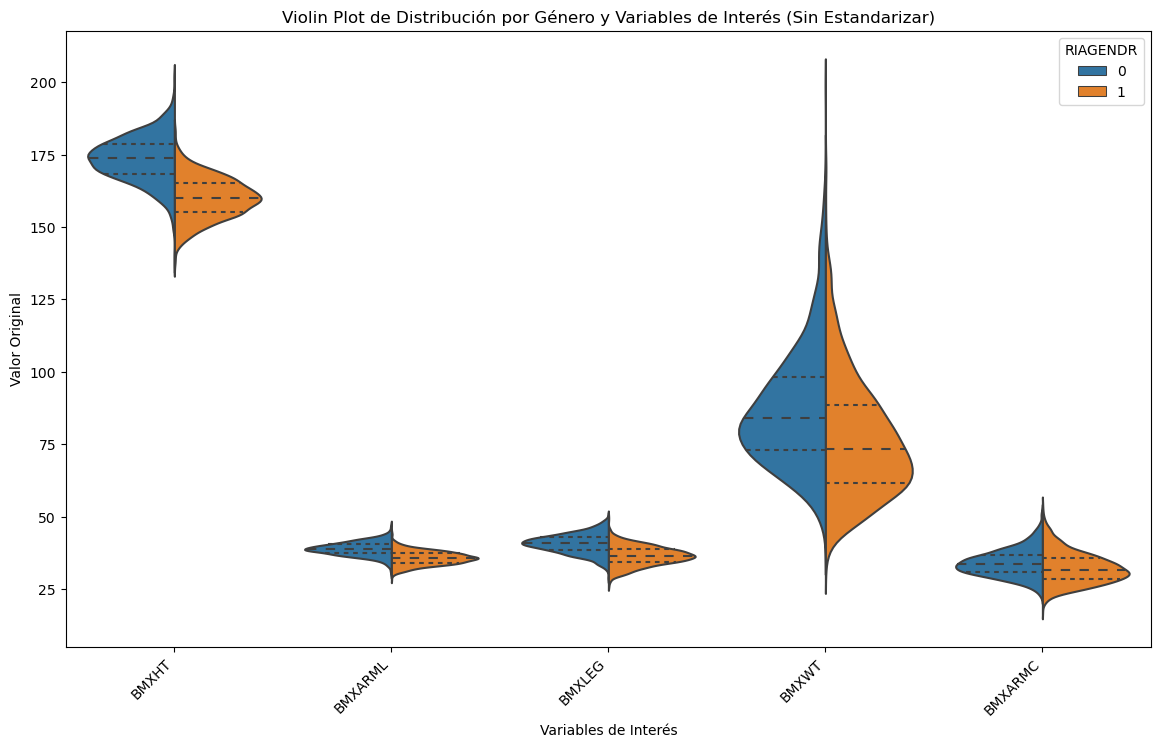

In [15]:
# Seleccionar las variables de interés
variables = ['BMXHT', 'BMXARML', 'BMXLEG', 'BMXWT', 'BMXARMC', 'RIAGENDR']

# Crear un DataFrame con las variables de interés
df_violinplot = df_datos3[variables]

# Creación del violinplot
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", hue="RIAGENDR", data=pd.melt(df_violinplot, id_vars=['RIAGENDR'], value_vars=variables[:-1]),
               inner="quartile", split=True, scale='width')
plt.title("Violin Plot de Distribución por Género y Variables de Interés (Sin Estandarizar)")
plt.xlabel("Variables de Interés")
plt.ylabel("Valor Original")
plt.xticks(rotation=45, ha="right")
plt.show()



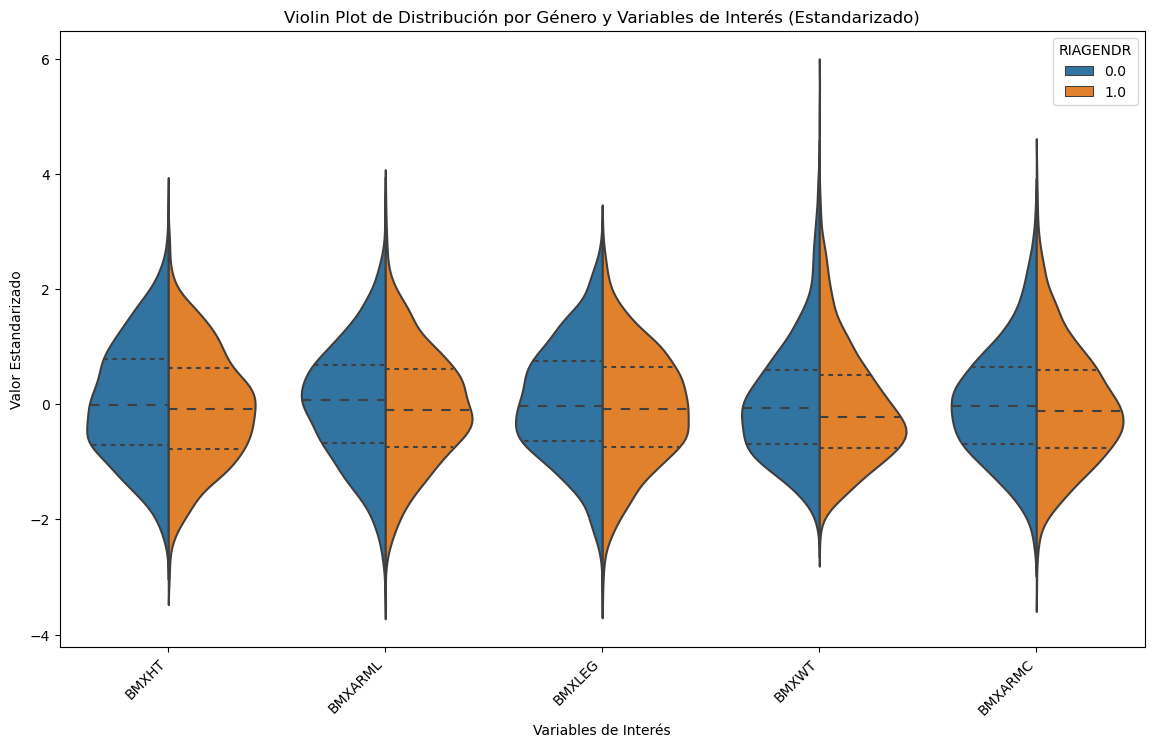

In [16]:
from sklearn.preprocessing import StandardScaler

# Se seleccionan las variables de interés
variables = ['BMXHT', 'BMXARML', 'BMXLEG', 'BMXWT', 'BMXARMC', 'RIAGENDR',]

# Se crea un DataFrame con las variables de interes.
df_violinplot = df_datos3[variables]

# Estandarizar los datos
scaler = StandardScaler()
df_violinplot_standardized = pd.DataFrame(scaler.fit_transform(df_violinplot.drop(columns=['RIAGENDR'])), columns=variables[:-1])
df_violinplot_standardized['RIAGENDR'] = df_violinplot['RIAGENDR']

# Creación del violinplot
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", hue="RIAGENDR", data=pd.melt(df_violinplot_standardized, id_vars=['RIAGENDR'], value_vars=variables[:-1]),
               inner="quartile", split = True)
plt.title("Violin Plot de Distribución por Género y Variables de Interés (Estandarizado)")
plt.xlabel("Variables de Interés")
plt.ylabel("Valor Estandarizado")
plt.xticks(rotation=45, ha="right")
plt.show()


Se puede observar que si existe una diferencia en los valores de cada una de estas variables antropométricas, esto se puede analizar más a fondo usando una prueba de t de Student para comparar las medias.

In [17]:
from scipy.stats import ttest_ind

# Crear un DataFrame con las variables de interés
df_prueba = df_datos3[variables]

# Dividir el DataFrame por género
df_hombres = df_prueba[df_prueba['RIAGENDR'] == 0]
df_mujeres = df_prueba[df_prueba['RIAGENDR'] == 1]

# Realizar la prueba t de Student para cada variable
resultados_prueba = {}
for variable in variables[:-1]:  # Excluir 'RIAGENDR' de la prueba
    stat, p_value = ttest_ind(df_hombres[variable].dropna(), df_mujeres[variable].dropna())
    resultados_prueba[variable] = {'Estadística de Prueba': stat, 'Valor p': p_value}

# Imprimir los resultados de la prueba
for variable, resultados in resultados_prueba.items():
    print(f"Variable: {variable}")
    print(f"Estadística de Prueba: {resultados['Estadística de Prueba']:.4f}")
    print(f"Valor p: {resultados['Valor p']:.4f}")
    print("------------------------")


Variable: BMXHT
Estadística de Prueba: 55.8440
Valor p: 0.0000
------------------------
Variable: BMXARML
Estadística de Prueba: 41.5421
Valor p: 0.0000
------------------------
Variable: BMXLEG
Estadística de Prueba: 38.7670
Valor p: 0.0000
------------------------
Variable: BMXWT
Estadística de Prueba: 16.3789
Valor p: 0.0000
------------------------
Variable: BMXARMC
Estadística de Prueba: 10.6828
Valor p: 0.0000
------------------------


Los resultados de la prueba t de Student indican que hay evidencia significativa para rechazar la hipótesis nula de que las medias de las variables de interés son iguales entre los géneros. Aquí hay una interpretación para cada variable:

- **BMXHT (Altura):**
  - Estadística de Prueba: 55.8440
  - Valor p: 0.0000
  - Interpretación: La altura entre hombres y mujeres es estadísticamente diferente, con un valor p muy cercano a cero, indicando una diferencia significativa en las medias.

- **BMXARML (Longitud del brazo):**
  - Estadística de Prueba: 41.5421
  - Valor p: 0.0000
  - Interpretación: La longitud del brazo entre hombres y mujeres es estadísticamente diferente, con un valor p muy cercano a cero, indicando una diferencia significativa en las medias.

- **BMXLEG (Longitud de la pierna):**
  - Estadística de Prueba: 38.7670
  - Valor p: 0.0000
  - Interpretación: La longitud de la pierna entre hombres y mujeres es estadísticamente diferente, con un valor p muy cercano a cero, indicando una diferencia significativa en las medias.

- **BMXWT (Peso):**
  - Estadística de Prueba: 16.3789
  - Valor p: 0.0000
  - Interpretación: El peso entre hombres y mujeres es estadísticamente diferente, con un valor p muy cercano a cero, indicando una diferencia significativa en las medias.

- **BMXARMC (Circunferencia del brazo):**
  - Estadística de Prueba: 10.6828
  - Valor p: 0.0000
  - Interpretación: La circunferencia del brazo entre hombres y mujeres es estadísticamente diferente, con un valor p muy cercano a cero, indicando una diferencia significativa en las medias.

En resumen, basándonos en estos resultados, podemos concluir que hay diferencias estadísticamente significativas en las medias de las variables de interés entre hombres y mujeres.

SMQ020     1.0   2.0
RIAGENDR            
0         0.51  0.49
1         0.33  0.67
ALQ101     1.0   2.0
RIAGENDR            
0         0.81  0.19
1         0.58  0.42


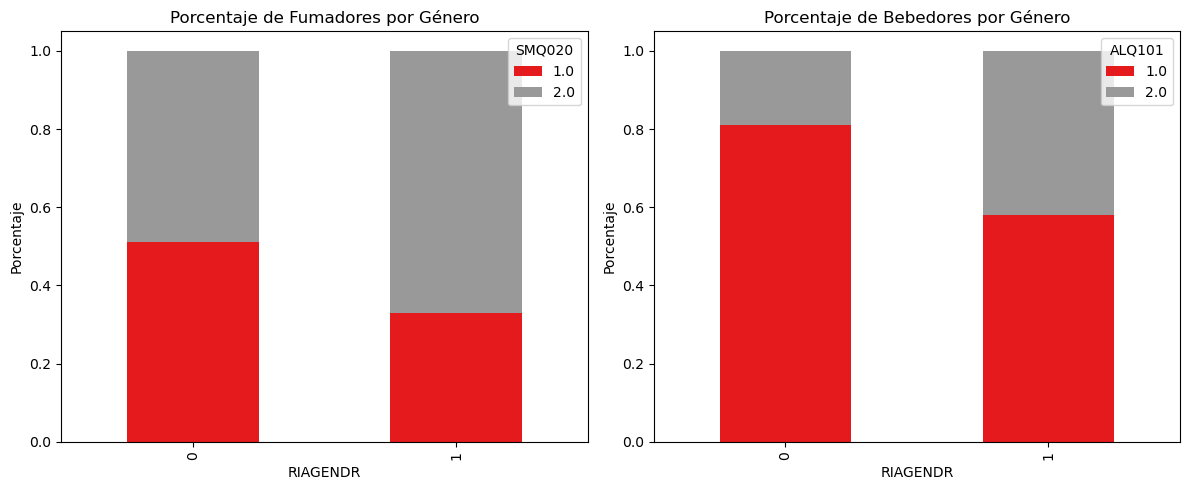

In [18]:
variables_categoricas = ['RIAGENDR', 'ALQ101', 'SMQ020']

# Crear un DataFrame con las variables de interés
df_categoricas = df_datos3[variables_categoricas]

# Calcular el porcentaje de fumadores por género
porcentaje_fumadores = df_categoricas.groupby('RIAGENDR')['SMQ020'].value_counts(normalize=True).unstack().round(2)
# Imprimir el resultado
print(porcentaje_fumadores)

# Calcular el porcentaje de bebedores por género
porcentaje_bebedores = df_categoricas.groupby('RIAGENDR')['ALQ101'].value_counts(normalize=True).unstack().round(2)

# Imprimir el resultado
print(porcentaje_bebedores)

# Configurar la figura y los ejes para dos gráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para fumadores
porcentaje_fumadores.plot(kind='bar', stacked=True, ax=axs[0], colormap='Set1')
axs[0].set_title('Porcentaje de Fumadores por Género')
axs[0].set_ylabel('Porcentaje')
axs[0].legend(title='SMQ020', loc='upper right')

# Gráfico para bebedores
porcentaje_bebedores.plot(kind='bar', stacked=True, ax=axs[1], colormap='Set1')
axs[1].set_title('Porcentaje de Bebedores por Género')
axs[1].set_ylabel('Porcentaje')
axs[1].legend(title='ALQ101', loc='upper right')

# Ajustes de diseño
plt.tight_layout()
plt.show()



La interpretación de los datos es la siguiente: 

- **RIAGENDR:**
  - 0: Hombre
  - 1: Mujer

- **ALQ101:**
  - 1: Ha bebido 12 o más bebidas en el último año
  - 2: No ha bebido 12 bebidas en el último año

- **SMQ020:**
  - 1: Ha fumado al menos 100 cigarrillos en su vida o en el último año
  - 2: No ha fumado al menos 100 cigarrillos en su vida o en el último año

Los datos presentados ofrecen una visión detallada de las respuestas según el género (RIAGENDR), el consumo de alcohol en el último año (ALQ101) y el consumo de cigarrillos a lo largo de la vida (SMQ020). A continuación, se presenta una interpretación focalizada en la cantidad de hombres y mujeres que fuman o no fuman, considerando las proporciones presentadas:

- **Hombres que fuman (SMQ020=1.0):** La tabla muestra que aproximadamente el 51% de los hombres han fumado al menos 100 cigarrillos en su vida o en el último año, mientras que el 49% de los hombres no ha tenido ese nivel de consumo de tabaco.

- **Mujeres que fuman (SMQ020=1.0):** Para las mujeres, alrededor del 33% ha fumado al menos 100 cigarrillos, mientras que el 67% no ha tenido ese nivel de consumo de tabaco.
  
- **Hombres que beben (ALQ101=1.0):** La tabla muestra que, alrededor del 81% ha bebido al menos 12 o más bebidas el último año, frente al  19% que no ha bebido.

- **Mujeres que beben(SMQ020=2.0):** Un menor procentaje de mujeres, el 58%, ha bebido al menos 12 o más bebidas el último año, en comparación con el 42% que no ha bebido.



## 3. Regresión Logística:

Con la información anteriormente recabada se hará la regresión logística

In [19]:
# Librerias necesarias para el preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind


### 3.1. Ajuste del modelo:

In [20]:
# Creación del conjunto de datos donde se llevará a cabo la regresión logística:
df_regresion = df_datos3.reset_index(drop=True)

# Asegurémonos de que el índice vaya de 0 a la longitud del DataFrame
df_regresion


,RIAGENDR,ALQ101,SMQ020,DMDEDUC2,DMDMARTL,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,0,1.0,1.0,5.0,1.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,0,1.0,1.0,3.0,1.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
2,1,2.0,2.0,5.0,6.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
3,1,2.0,2.0,4.0,3.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
4,1,1.0,2.0,4.0,1.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,0,1.0,2.0,2.0,1.0,118.0,58.0,89.5,164.9,32.9,40.0,38.0,39.0,101.0,2.0
3767,0,2.0,2.0,5.0,5.0,112.0,76.0,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0
3768,1,2.0,1.0,3.0,2.0,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
3769,0,2.0,2.0,5.0,1.0,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0


### 3.2. Modelo de regresión 1:

En la construcción de modelos de regresión logística, es una práctica común dividir nuestro conjunto de datos en conjuntos de entrenamiento (train) y prueba (test). Esta práctica nos permite entrenar nuestro modelo en una parte de los datos y evaluar su rendimiento en datos no vistos, proporcionando una estimación más precisa de la capacidad de generalización del modelo.

En este contexto, se ha decidido dividir el conjunto de datos utilizando una proporción comúnmente utilizada: el 80% de los datos se destinarán al conjunto de entrenamiento, mientras que el 20% restante se reservará para el conjunto de prueba. Esta división nos permitirá ajustar nuestro modelo a un conjunto significativo de datos y luego evaluar su desempeño en datos independientes, brindándonos una visión más completa de su capacidad predictiva.

In [21]:
# División de los datos en train y test: 
X = df_regresion.drop(columns = 'RIAGENDR')
y = df_regresion['RIAGENDR']

X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            train_size = 0.8,
                                            random_state = 42,
                                            shuffle = True
                                            )

# Verificar las formas de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (3016, 14)
Forma de X_test: (755, 14)
Forma de y_train: (3016,)
Forma de y_test: (755,)


A continuación se realiza el ajuste del modelo de regresión logística utilizando la biblioteca Statsmodels. Primero, se añade una columna constante al conjunto de entrenamiento para incorporar el intercepto en el modelo. Luego, se utiliza la clase `GLM` para especificar un modelo de regresión logística con la distribución binomial. El modelo se ajusta a los datos de entrenamiento mediante el método `fit()`, estimando así los parámetros del modelo. Finalmente, se imprime un resumen detallado que incluye información relevante sobre coeficientes, valores p y otras estadísticas asociadas al modelo ajustado.

In [22]:
# Añadir una columna constante al conjunto de entrenamiento
X_train = sm.add_constant(X_train)

#Ajustar el modelo de regresión logística con statsmodels
modelo = sm.GLM(endog=y_train, exog=X_train, family = sm.families.Binomial())
resultado = modelo.fit()

# Resumen del modelo para el conjunto de entrenamiento
print(resultado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               RIAGENDR   No. Observations:                 3016
Model:                            GLM   Df Residuals:                     3001
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1041.7
Date:                Wed, 17 Jan 2024   Deviance:                       2083.4
Time:                        15:31:36   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5005
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3754      7.119      3.143      0.0

Como se puede varios valores de p son mayores que 0.05, por lo que se eliminarán de una siguiente predicción, pero de momento se analizarán algunas estadísticas adicionales con este modelo.


Despues de ajustar el modelo de regresión, se realizan predicciones en el conjunto de prueba para evaluar la capacidad del modelo de generalizar a datos no vistos. Primero, se añade una columna constante al conjunto de prueba para asegurar que tenga la misma estructura que el conjunto de entrenamiento. Luego, se utilizan los parámetros estimados del modelo ajustado para predecir las probabilidades en el conjunto de prueba. Estas probabilidades se clasifican posteriormente en dos categorías (0 o 1) utilizando un umbral de 0.5. La clasificación resultante se compara con las etiquetas reales del conjunto de prueba para calcular la precisión del modelo en este conjunto específico.

In [23]:
# Añadir una columna constante al conjunto de prueba
X_test = sm.add_constant(X_test, prepend=True)

# Predecir en el conjunto de prueba
predicciones = resultado.predict(exog=X_test)
clasificacion = (predicciones > 0.5).astype(int)

# Calcular y mostrar la precisión de prueba
accuracy_test = (clasificacion == y_test).mean()
print(f"La precisión de la prueba es: {100*accuracy_test:.2f}%")


La precisión de la prueba es: 85.30%


A continuación se elabora una matriz de confusión La matriz de confusión compara las predicciones del modelo con las etiquetas reales en el conjunto de prueba. En este caso, se utiliza la función `pd.crosstab` para crear la matriz, donde las filas representan las clases reales y las columnas representan las clases predichas. La matriz de confusión proporciona información detallada sobre los aciertos y errores del modelo, permitiendo analizar la calidad de las predicciones.

In [24]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,311,55
1,56,333


A continuación se usa la función `classification_report` de la biblioteca scikit-learn para generar un informe detallado de las métricas de rendimiento del modelo de clasificación. Aquí se especifica el argumento `target_names` para asignar etiquetas descriptivas a las clases, en este caso, "Hombre" y "Mujer". El informe incluye medidas como precisión (accuracy), recall, F1-score y soporte para cada clase, así como valores agregados como la precisión promedio y el recall promedio. La precisión se refiere a la proporción de instancias correctamente clasificadas como positivas en relación con todas las instancias clasificadas como positivas. Recall (o sensibilidad) mide la proporción de instancias positivas correctamente identificadas en relación con todas las instancias que son realmente positivas. El F1-score es una medida balanceada entre precisión y recall. El soporte indica la cantidad de instancias en cada clase.

In [25]:
from sklearn.metrics import classification_report

target_names = ['Hombre', 'Mujer']
print(classification_report(y_test, clasificacion, target_names=target_names))

              precision    recall  f1-score   support

      Hombre       0.85      0.85      0.85       366
       Mujer       0.86      0.86      0.86       389

    accuracy                           0.85       755
   macro avg       0.85      0.85      0.85       755
weighted avg       0.85      0.85      0.85       755



### 3.3. Modelo de regresión 2:

Se elimnan las variables que mostaron un mayor vaor de p, ya que se consideran no tan sigificativas estadísticamente. Esto ayuda a simplificar el modelo y mejorar la predicción.

In [26]:
df_regresion2 = df_regresion.drop(['HIQ210','BPXDI2','SMQ020','BMXARML','BMXHT'],axis=1)

X = df_regresion2.drop(columns = 'RIAGENDR')
y = df_regresion2['RIAGENDR']

X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            train_size = 0.8,
                                            random_state = 42,
                                            shuffle = True
                                            )

# Verificar las formas de los conjuntos resultantes
print('Verificación de las formas de los conjuntos resultantes \n')
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

# Añadir una columna constante al conjunto de entrenamiento
X_train = sm.add_constant(X_train)

#Ajustar el modelo de regresión logística con statsmodels
modelo = sm.GLM(endog=y_train, exog=X_train, family = sm.families.Binomial())
resultado = modelo.fit()

# Separador entre la verificación de la forma y el resumen del modelo
print("\n" + "="*78 + "\n")

# Resumen del modelo para el conjunto de entrenamiento
print(resultado.summary())


Verificación de las formas de los conjuntos resultantes 

Forma de X_train: (3016, 9)
Forma de X_test: (755, 9)
Forma de y_train: (3016,)
Forma de y_test: (755,)


                 Generalized Linear Model Regression Results                  
Dep. Variable:               RIAGENDR   No. Observations:                 3016
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1047.7
Date:                Wed, 17 Jan 2024   Deviance:                       2095.4
Time:                        15:31:36   Pearson chi2:                 4.05e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4985
Covariance Type:            nonrobust                                         
                 coef    std err          z   

Como se puede observar ahora todas las variables son significativas estádisticamente, y como se puede ver en las siguientes pruebas, a su vez mejora la precisión de nuestro modelo.

In [27]:
# Añadir una columna constante al conjunto de prueba
X_test = sm.add_constant(X_test, prepend=True)

# Predecir en el conjunto de prueba
predicciones = resultado.predict(exog=X_test)
clasificacion = (predicciones > 0.5).astype(int)

# Calcular y mostrar la precisión de prueba
accuracy_test = (clasificacion == y_test).mean()
print(f"La precisión de la prueba es: {100*accuracy_test:.2f}%")


La precisión de la prueba es: 86.09%


In [28]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,311,55
1,50,339


In [29]:
from sklearn.metrics import classification_report

target_names = ['Hombre', 'Mujer']
print(classification_report(y_test, clasificacion, target_names=target_names))

              precision    recall  f1-score   support

      Hombre       0.86      0.85      0.86       366
       Mujer       0.86      0.87      0.87       389

    accuracy                           0.86       755
   macro avg       0.86      0.86      0.86       755
weighted avg       0.86      0.86      0.86       755



**Curva ROC:** 

La Curva ROC (Receiver Operating Characteristic) es una representación gráfica del rendimiento de un modelo de clasificación binaria en diferentes umbrales de decisión. La curva muestra la relación entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos (1 - Especificidad) en función de diferentes valores de umbral.

En la Curva ROC, el eje x representa la tasa de falsos positivos (FPR), que es la proporción de instancias negativas incorrectamente clasificadas como positivas. El eje y representa la tasa de verdaderos positivos (TPR), que es la proporción de instancias positivas correctamente clasificadas como positivas (también conocida como sensibilidad o recall).

Un modelo ideal tendría una Curva ROC que se elevaría rápidamente hacia la esquina superior izquierda, indicando una alta sensibilidad y una baja tasa de falsos positivos. El área bajo la Curva ROC (AUC-ROC) proporciona una medida numérica del rendimiento del modelo, donde un valor de 1.0 indica un rendimiento perfecto y 0.5 indica un rendimiento similar al azar.


**Representación de la Curva ROC del modelo, y de una matriz de confusión:**

A continuación se realizará una  evaluación del rendimiento del modelo de regresión logística en el conjunto de prueba utilizando métricas como la Curva ROC (Receiver Operating Characteristic) y la Matriz de Confusión.

Primero, se calculan las probabilidades predichas (`y_pred_proba`) en el conjunto de prueba utilizando el modelo entrenado. Luego, se calculan los valores necesarios para la Curva ROC, como la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR) y los umbrales.

Posteriormente, se crea una figura con dos subgráficos para visualizar la Curva ROC y la Matriz de Confusión. En el primer subgráfico, se representa la Curva ROC con la tasa de falsos positivos en el eje x y la tasa de verdaderos positivos en el eje y. En el segundo subgráfico, se muestra la Matriz de Confusión, que proporciona información sobre las predicciones del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


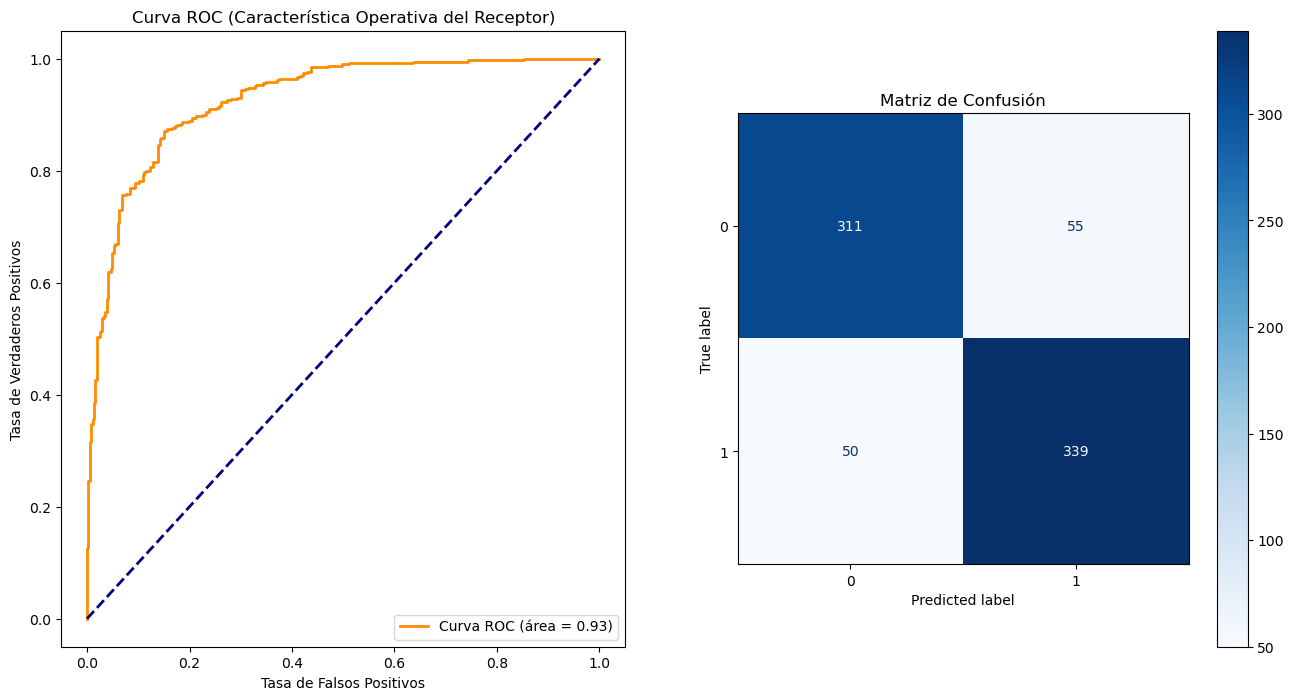

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Calcular las probabilidades predichas en el conjunto de prueba
y_pred_proba = predicciones

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Especificación del tamaño de la gráfica
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Curva ROC
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('Tasa de Falsos Positivos')
axes[0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0].set_title('Curva ROC (Característica Operativa del Receptor)')
axes[0].legend(loc='lower right')

# Matriz de confusión
cm = confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d', ax=axes[1])
axes[1].set_title('Matriz de Confusión')

plt.show()


## 4. Conclusión:

La construcción y evaluación del modelo de regresión logística revela buenos resultados . La precisión del 86.09% indica que el modelo es capaz de clasificar correctamente la mayoría de las observaciones. Tras un proceso de selección de variables, se identificaron 9 variables predictoras (ALQ101, DMDEDUC2, DMDMARTL, BPXSY2, BMXWT, BMXBMI, BMXLEG, BMXARMC, BMXWAIST), todas las cuales resultaron ser estadísticamente significativas.

El objetivo de predecir la probabilidad de género (hombre o mujer) se logró exitosamente, y la curva ROC con un área bajo la curva (AUC) de 0.93 refleja un rendimiento bastante bueno. Un AUC de 0.93 indica que el modelo tiene una capacidad significativamente mejor que el azar para distinguir entre las clases de género. Este resultado sugiere que el modelo es robusto y preciso en su capacidad para clasificar nuestros sujetos.



## 5. Bibliografía:

1. National Center for Health Statistics. (2017, septiembre). *National Health and Nutrition Examination Survey 2015-2016 Data Documentation, Codebook, and Frequencies: Demographic Variables and Sample Weights (DEMO_I)*. Recuperado de https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

2. National Center for Health Statistics. (2017, septiembre). *National Health and Nutrition Examination Survey 2015-2016 Data Documentation, Codebook, and Frequencies: Smoking - Cigarette Use (SMQ_I)*. Recuperado de https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm#SMQ020

3. National Center for Health Statistics. (2018, marzo). *National Health and Nutrition Examination Survey 2015-2016 Data Documentation, Codebook, and Frequencies: Alcohol Use (ALQ_I)*. Recuperado de https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.html

4. Amat Rodrigo, J. (2020, noviembre). *Regresión logística con Python*. Recuperado de https://cienciadedatos.net/documentos/py17-regresion-logistica-python.html

5. James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). *An Introduction to Statistical Learning: with Applications in Python* (Springer Texts in Statistics) (pp. 173-179).

6. Navlani, A. (2019, diciembre). Understanding Logistic Regression in Python Tutorial. Recuperado de https://www.datacamp.com/tutorial/understanding-logistic-regression-python